In [1]:
import os
import cv2
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image
from matplotlib import pyplot as plt
import random

In [2]:
images=[]
labels=[]
for folders in os.listdir('./data/uTHCD_a(70-30-split)/70-30-split/train-test-classwise/Train'):
    for files in os.listdir('./data/uTHCD_a(70-30-split)/70-30-split/train-test-classwise/Train/'+folders):
        img=cv2.imread('./data/uTHCD_a(70-30-split)/70-30-split/train-test-classwise/Train/'+folders+'/'+files,0)/255
        images.append(img)
        labels.append(folders)
images=np.array(images)
labels=np.array(labels)    

In [3]:
# len(images)

In [4]:
# fig = plt.figure(figsize=(14, 8))
# row = 2
# col = 2

# for i in range(row*col):
#     fig.add_subplot(row,col,i+1)
#     plt.imshow(random.choice(images))

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64,64,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(32, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dense(256, activation='relu'))
model.add(Dense(156, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 156)               1

In [6]:
y_labels=to_categorical(labels)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.33, random_state=42)
keras.initializers.lecun_uniform(seed=None)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
#model.fit_generator(datagen.flow(X_train, y_train, batch_size=320),
 #                   steps_per_epoch=len(X_train) / 32, epochs=20)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=1)
scores = model.evaluate(images, y_labels, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
422/422 [==============================] - 122s 279ms/step - loss: 1.0599 - accuracy: 0.7535 - val_loss: 0.4630 - val_accuracy: 0.8789
Epoch 2/10
422/422 [==============================] - 128s 303ms/step - loss: 0.2471 - accuracy: 0.9338 - val_loss: 0.4137 - val_accuracy: 0.8954
Epoch 3/10
422/422 [==============================] - 140s 332ms/step - loss: 0.0872 - accuracy: 0.9748 - val_loss: 0.4261 - val_accuracy: 0.8973
Epoch 4/10
422/422 [==============================] - 136s 323ms/step - loss: 0.0317 - accuracy: 0.9907 - val_loss: 0.4923 - val_accuracy: 0.9047
Epoch 5/10
422/422 [==============================] - 136s 322ms/step - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.5420 - val_accuracy: 0.9008
Epoch 6/10
422/422 [==============================] - 151s 358ms/step - loss: 0.0134 - accuracy: 0.9966 - val_loss: 0.5529 - val_accuracy: 0.9036
Epoch 7/10
422/422 [==============================] - 194s 459ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.5674 -

In [8]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

649/649 [==============================] - 16s 23ms/step


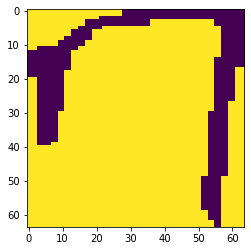

In [9]:
img=images[0]
plt.imshow(img)

In [10]:
print(classes_x)

[ 31 149  88 ... 155 113  76]


In [11]:
classes_y=np.argmax(y_test,axis=1)
print(classes_y)

[ 31  53  88 ... 155 113  76]


In [12]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# fig = plt.figure(figsize=(900, 900))


# c = confusion_matrix(classes_x, classes_y)
# c_d = ConfusionMatrixDisplay(confusion_matrix=c)
# c_d.plot()
# plt.show()

In [13]:
# import pickle
# filename = 'Basic_CNN.sav'
# pickle.dump(model, open(filename, 'wb'))

1/1 [==============================] - 0s 19ms/step


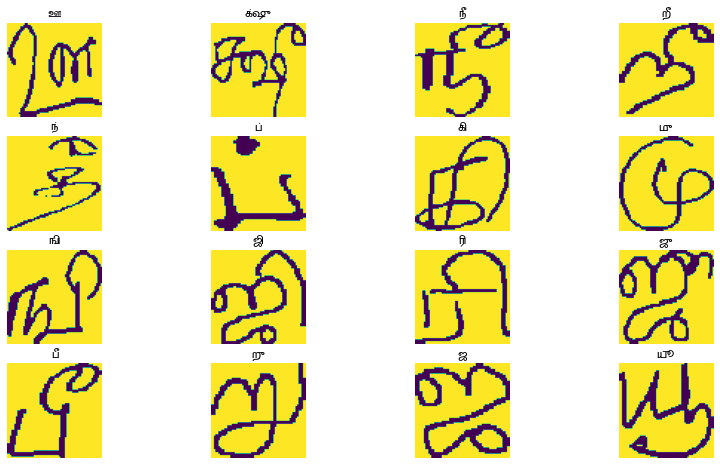

In [38]:
from matplotlib.font_manager import FontProperties
fig = plt.figure(figsize=(14, 8))
row = 4
col = 4

for i in range(row*col):
    fig.add_subplot(row,col,i+1)
    img = random.choice(images)
    prop = FontProperties()
    
    prop.set_file('./fonts/Latha.ttf')
    plt.axis('off') 
    plt.imshow(img)
    plt.title(classToUnicode[np.argmax(model.predict(np.array([img])),axis=1)[0]],fontproperties=prop)